20000


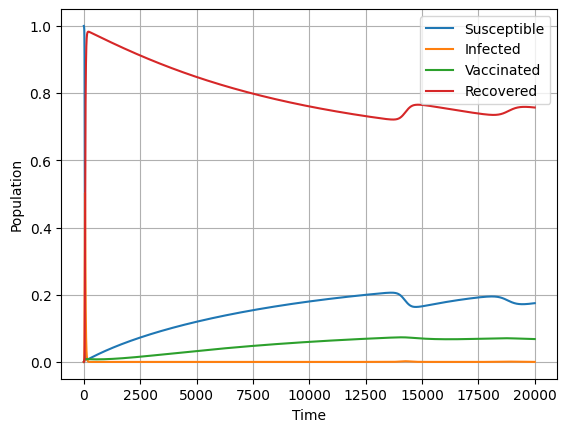

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Total population, N.
N = 1
# Initial number of infected and recovered individuals, I0, R0 and V0 .
I0, R0, V0 = 0.0001, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - V0
# Model parameters
alpha=  0.000035342
beta = 0.261994381      #Infection per day
omega= 0.00020185       #Rate of first dose of vacination
gamma= 0.0476           #Recovered rate
roh=  1/4380            #Time between first and second dose
psi= 1/3650             #first dose wanes in immunity
mu= 0.000035342 
# A grid of time points (in days)
n = 20000
t = np.linspace(0, n, n)

# The SIR model differential equations.
def model(t, y, alpha ,beta, gamma, mu, roh,psi, omega):
    S, I, V, R = y
    dsdt = alpha*N - beta *S*I - mu *S - omega* S + psi* V  
    dvdt = omega*S - mu*V - psi*V - roh*V
    didt = beta * S*I - mu*I - gamma* I
    drdt = gamma* I - mu* R + roh*V
    return dsdt, didt, dvdt, drdt

# Initial conditions vector
y0 = S0, I0, V0, R0
# Integrate the SIR equations over the time grid, t.def 
# sol = odeint(model, y0, t, args=(alpha ,beta, gamma, mu, roh, psi, omega))
# S, I, R, v = sol.T
sol1 = solve_ivp(model,(0,n),y0,t_eval=t,method="RK45",args=(alpha ,beta, gamma, mu, roh, psi, omega))
sol = sol1['y']
# print(sol)



# Extract the results
S = sol[0]
I = sol[1]
V = sol[2]
R = sol[3]
print(len(S))

# Plot the results
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(V, label='Vaccinated')
plt.plot(R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()
